In [ ]:
import pandas as pd

ratings_details = pd.read_csv('/content/drive/MyDrive/Dataset.csv')
ratings_details.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
movies_id = pd.read_csv('/content/drive/MyDrive/Movie_Id_Titles.csv')
movies_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings_details.shape

(100003, 4)

In [ ]:
ratings_details.describe()


,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
dataset = pd.merge(ratings_details, movies_id, on='item_id' )
dataset.tail()

,user_id,item_id,rating,timestamp,title
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
100002,655,1641,3,887427810,Dadetown (1995)


In [ ]:
movies_id.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [ ]:
import datetime
from datetime import datetime, date

# converts the 'timestamp' column to datetime format.
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [ ]:
dataset.shape

(100003, 6)

In [ ]:
dataset.nunique()


user_id        944
item_id       1682
rating           5
timestamp    49282
title         1664
datetime     49282
dtype: int64

In [ ]:
dataset.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
a=dataset
#  groups the DataFrame by the 'title' column.
a=a.groupby('title')['rating'].mean()#calculates the mean of the 'rating' column for each group.
a

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [ ]:
# a.sort will contain the titles sorted by their average ratings, with the highest-rated titles at the top.
sorted_ratings_wise = a.sort_values(ascending=False)
sorted_ratings_wise

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [ ]:
b=dataset
b=b.groupby('title')['rating'].count()
b

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [ ]:
new_records= pd.DataFrame()
new_records['average_rating']=a


In [ ]:
new_records['count of total rating']=b
new_records.head()

,average_rating,count of total rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
# importing data visuslization libraries

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

new_records.columns

Index(['average_rating', 'count of total rating'], dtype='object')

In [ ]:
# plot graphs of 'number of rating columns'

array([[<Axes: title={'center': 'count of total rating'}>]], dtype=object)

<Figure size 1000x900 with 0 Axes>

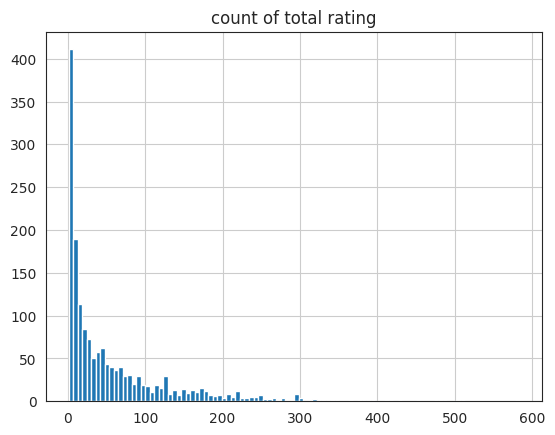

In [ ]:
plt.figure(figsize=(10, 9))

new_records.hist(['count of total rating'], bins = 100)

array([[<Axes: title={'center': 'average_rating'}>]], dtype=object)

<Figure size 1000x900 with 0 Axes>

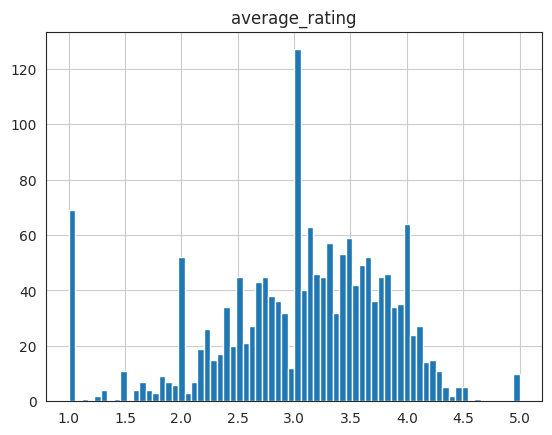

In [ ]:
plt.figure(figsize=(10, 9))

new_records.hist(['average_rating'], bins = 70)

<Figure size 1000x900 with 0 Axes>

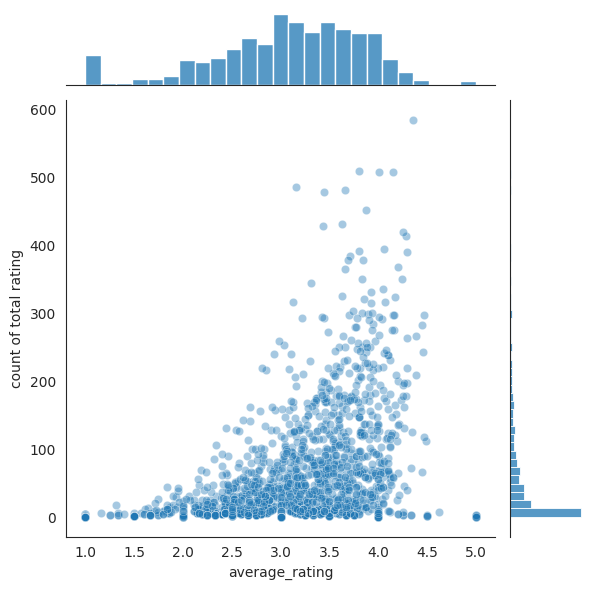

In [ ]:
plt.figure(figsize=(10, 9))

sns.jointplot(x='average_rating', y='count of total rating', data=new_records, alpha=0.4)

In [ ]:
# sorting values asccendind to the 'number of rating columns '


data=dataset.pivot_table(index='user_id', columns='title', values='rating' )
data.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)

In [ ]:
data['2001: A Space Odyssey (1968)']

user_id
0      NaN
1      4.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    3.0
943    NaN
Name: 2001: A Space Odyssey (1968), Length: 944, dtype: float64

In [ ]:
data1=data['2001: A Space Odyssey (1968)']

data1.tail()

user_id
939    NaN
940    NaN
941    NaN
942    3.0
943    NaN
Name: 2001: A Space Odyssey (1968), dtype: float64

In [ ]:
data2=data.corrwith(data1)
data2

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)               -0.426401
1-900 (1994)                            -0.981981
101 Dalmatians (1996)                   -0.043407
12 Angry Men (1957)                      0.178848
187 (1997)                              -0.554700
                                           ...   
Young Guns II (1990)                    -0.154765
Young Poisoner's Handbook, The (1995)   -0.341753
Zeus and Roxanne (1997)                 -1.000000
unknown                                  0.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

<ipython-input-101-7362079ad22c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = dataset.corr()


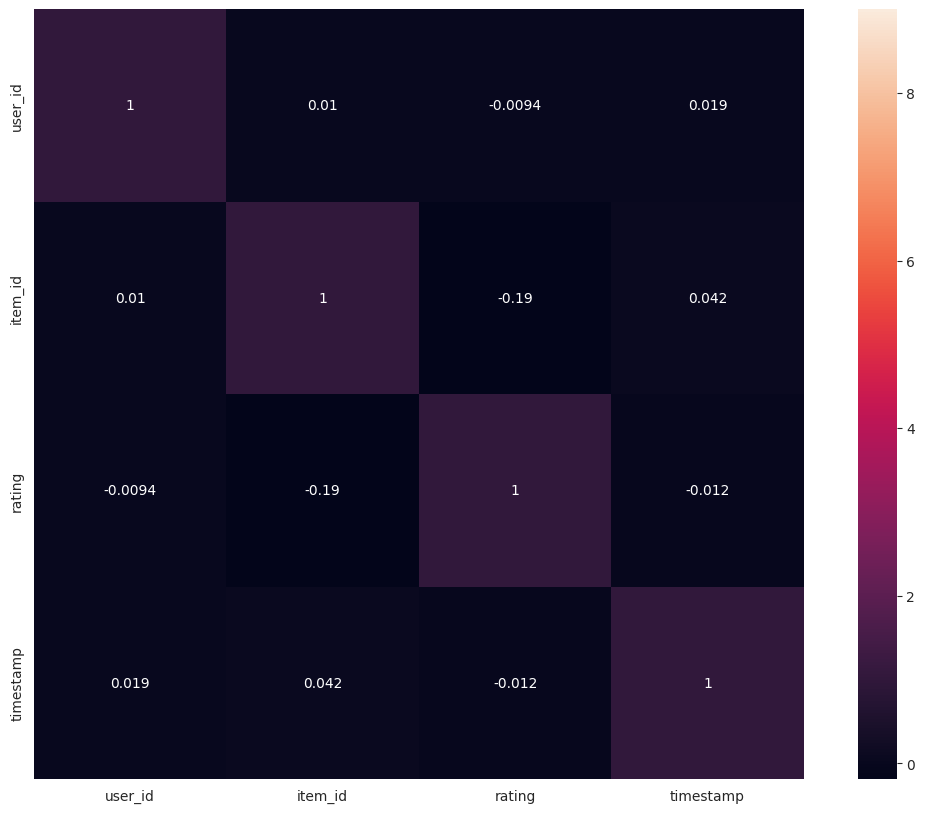

In [ ]:
import matplotlib.pyplot as plt

correlation_metrics = dataset.corr()
fig= plt.figure(figsize=(14, 10))

sns.heatmap(correlation_metrics, annot=True, vmax=9, square = True)

plt.show()

In [ ]:
movie_corr=pd.DataFrame(data2, columns=['correlation'])
movie_corr

,correlation
title,
'Til There Was You (1997),-0.426401
1-900 (1994),-0.981981
101 Dalmatians (1996),-0.043407
12 Angry Men (1957),0.178848
187 (1997),-0.554700
...,...
Young Guns II (1990),-0.154765
"Young Poisoner's Handbook, The (1995)",-0.341753
Zeus and Roxanne (1997),-1.000000
